In [1]:
%matplotlib nbagg
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn.decomposition import PCA  
from IPython.display import Image

# Exercice à rendre


Dans cet exercice, nous allons analyser des données sur les joueurs de basket. Les données sont disponible sur Moodle sous le nom "NBA.csv".

Les données étudiées ici s’appuient sur les résultats de quatre équipes lors de la saison régulière 2012-2013. 
Pour chacun des 69 joueurs, les informations que nous avons sont les suivantes :
- Taille (Height)
- Poids (Width) 
- Age (Age)
- Salaire (Salary)
- Equipe (Team)
- Poste occupé (Position)
- Nombre de matchs joués (Games played)
- Nombre de minutes jouées (Minutes)
- Paniers à 2 points réussis (en moyenne durant un match) (Fields goals made)
- Paniers à 2 points tentés (en moyenne durant un match) (Fields goal attempted)
- Pourcentage de paniers à 2 points réussis (en moyenne durant un match) (%Fields goal made)
- Nombre de paniers à 3 points réussis (en moyenne durant un match) (3pts FGM)
- Nombre de paniers à 3 points tentés (en moyenne durant un match) (3pts FGA)
- Pourcentage de paniers à 3 points réussis (en moyenne durant un match) (% 3pts FG)
- Nombre de lancers francs réussis (en moyenne durant un match) (Free throws made)
- Nombre de lancers francs tentés (en moyenne durant un match) (Free throws attempted)
- Pourcentage de lancers francs réussis (en moyenne durant un match) (% FT)
- Nombre de rebonds offensifs (en moyenne durant un match) (Off rebond)
- Nombre de rebonds défensifs (en moyenne durant un match) (Def rebond)
- Nombre total de rebonds (en moyenne durant un match) (Total rebond)
- Nombre de passes décisives (en moyenne durant un match) (Assits)
- Nombre de ballons perdus (en moyenne durant un match) (Turnover)
- Nombre d’interceptions (en moyenne durant un match) (Steals)
- Nombre de blocs tentés (en moyenne durant un match) (Blocks)
- Nombre de blocs réussis (en moyenne durant un match) (Blocked fields goals attempted)
- Fautes subies (en moyenne durant un match) (Personnal fouls)
- Fautes provoquées (en moyenne durant un match) (Personnal fouls drawn)
- Nombre de points marqués (en moyenne durant un match) (Points)
- Différence de score pendant la présence du joueur sur le terrain (en moyenne durant un match) (Point differential of the score)

Ces informations ont été prises sur le site www.NBA.com. Voici un graphique qui montre à quels emplacements correspondes les valeurs de la variable position:

In [2]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/a/ac/Basketball_Positions.png')

Vous répondrez aux questions soit dans ce même notebook, dans un autre notebook ou dans un script python. Dans tous les cas, indiquez clairement le numéro des questions auxquelles vous répondez. Renommez le fichier en **Nom_Prénom_NB8**, puis déposez le sur Moodle dans la rubrique devoirs.

1. Importez les données sous forme d'un dataframe. Familiarisez-vous avec le tableau des données : Vérifiez la taille du tableau, regardez le type des différentes variables etc.

 ##### Variables qualitatives
 ---

2. Transformez les variables **Height** (notée $H$) et **Fields goal attempted** (notée $G$) en variables qualitatives de la manière suivante. Ajoutez dans le dataframe une variable **Taille** qui prends pour valeurs 'petit' lorsque $H\in[0,1.95)$, 'moyen' lorsque $H\in[1.95,2.06)$ et 'long' lorsque $H\in[2.06,3)$. Ajoutez aussi une variable **Tirs** qui prends pour valeurs 'peu' lorsque $G\in[0,5)$, 'normal' lorsque $G\in[5,15)$ et 'beaucoup' lorsque $G\in[15,30)$.

3. Calculez la distance du $\chi^2$ entre les variables **Position** et **Taille**. Calculez la distance du $\chi^2$ entre les variables **Position** et **Tirs**. Qu'est ce que vous en concluez ?

 ##### Données multivariées et ACP
 ---

4. Affichez le nuage de points en dimension 2 pour les variables **Height** et **Weight**. Affichez le nuage de points en dimension 3 pour les variables **Height**, **Weight** et **Blocks**.

5. Effectuez une ACP (en gardant toutes les composantes).

6. Donnez la part de la variance expliquée par les différentes composantes principales. Combien de composantes principales faut-il au minimum pour que la part de la variance expliquée soit supérieur à $0.9$ ? Avec quel graphique peut-on répondre à la question précédente ? Affichez ce graphique.

7. Affichez le nuage des points des deux premières composantes principales.

8. Modifiez le graphique prédédent (question 8) pour que les points aient une couleur différente selon les valeurs de la variable **Position**. Projetez les individus moyens (barycentres) par rapport aux valeurs de la variable **Position** sur les deux premières composantes principales et affichez-les sur le nuage des points. Que remarquez-vous ? (Un individu moyen pour un certain groupe se calcule en faisant la moyenne de toutes les variables quantitatives sur l'ensemble des individus appartenant à ce groupe)

## Question 1

In [3]:
basket_data=pd.read_csv("NBA.csv")

In [4]:
basket_data.shape

(69, 30)

In [5]:
basket_data.head()

,Players,Height,Weight,Age,Salary,Team,Position,Games played,Minutes,Fields goals made,...,Total rebond,Assits,Turnover,Steals,Blocks,Blocked fields goals attempted,Personnal fouls,Personnal fouls drawn,Points,Point differential of the score
0,Chris Andersen,2.08,111.1,33,341756,Miami_Heat,Center,42,14.9,1.7,...,4.1,0.4,0.6,0.4,1.0,0.3,2.1,2.1,4.9,2.3
1,Chris Bosh,2.11,106.1,28,17545000,Miami_Heat,Center,74,33.2,6.6,...,6.8,1.7,1.7,0.9,1.4,0.6,2.3,3.1,16.6,6.4
2,Dexter Pittman,2.11,139.7,24,854389,Miami_Heat,Center,4,2.9,0.8,...,1.8,0.0,0.5,0.0,0.0,0.3,1.0,0.0,1.5,-2.8
3,Dwyane Wade,1.93,99.8,30,17182000,Miami_Heat,Guard,69,34.6,8.2,...,5.0,5.1,2.8,1.9,0.8,0.5,2.0,4.7,21.2,8.3
4,James Jones,2.03,97.5,31,1500000,Miami_Heat,Forward,38,5.8,0.6,...,0.6,0.3,0.1,0.1,0.2,0.0,0.4,0.1,1.6,-0.4


In [6]:
basket_data.dtypes

Players                             object
Height                             float64
Weight                             float64
Age                                  int64
Salary                               int64
Team                                object
Position                            object
Games played                         int64
Minutes                            float64
Fields goals made                  float64
Fields goal attempted              float64
% Fields goal made                 float64
3pts FGM                           float64
3pts  FGA                          float64
% 3pts FG                          float64
Free throws made                   float64
Free throws attempted              float64
% FT                               float64
Off rebond                         float64
Def rebond                         float64
Total rebond                       float64
Assits                             float64
Turnover                           float64
Steals     

In [7]:
basket_data.describe()

,Height,Weight,Age,Salary,Games played,Minutes,Fields goals made,Fields goal attempted,% Fields goal made,3pts FGM,...,Total rebond,Assits,Turnover,Steals,Blocks,Blocked fields goals attempted,Personnal fouls,Personnal fouls drawn,Points,Point differential of the score
count,69.000000,69.000000,69.00000,6.900000e+01,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,2.016232,103.239130,28.42029,4.412538e+06,51.507246,19.408696,2.889855,6.302899,0.445507,0.637681,...,3.615942,1.630435,1.082609,0.626087,0.447826,0.320290,1.585507,1.513043,7.778261,2.123188
std,0.081531,12.199159,5.21425,5.516463e+06,26.805741,10.047486,2.490874,5.047625,0.109162,0.683654,...,2.955833,1.751076,0.781770,0.489794,0.545734,0.284181,0.728470,1.495081,6.844424,3.246226
min,1.830000,79.400000,20.00000,3.773700e+04,1.000000,2.900000,0.000000,0.400000,0.000000,0.000000,...,0.500000,0.000000,0.100000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,-9.000000
25%,1.960000,95.300000,24.00000,8.543890e+05,28.000000,10.600000,1.100000,2.700000,0.410000,0.000000,...,1.900000,0.400000,0.600000,0.300000,0.100000,0.100000,1.000000,0.600000,3.000000,-0.100000
50%,2.030000,106.100000,28.00000,2.020200e+06,60.000000,18.800000,2.100000,4.500000,0.450000,0.400000,...,2.700000,1.000000,0.800000,0.600000,0.200000,0.300000,1.600000,1.000000,5.300000,1.800000
75%,2.080000,111.100000,32.00000,4.060000e+06,75.000000,27.500000,3.800000,8.800000,0.520000,1.100000,...,5.000000,1.900000,1.400000,0.800000,0.700000,0.400000,2.000000,1.600000,10.500000,4.100000
max,2.210000,139.700000,41.00000,1.994880e+07,82.000000,38.500000,10.100000,22.200000,0.640000,2.300000,...,18.000000,7.600000,3.500000,1.900000,3.000000,1.300000,3.600000,6.500000,28.700000,9.500000


## Question 2

In [8]:
basket_data['Tirs'] = 'peu'
basket_data.loc[basket_data['Fields goal attempted']>=5,'Tirs'] = 'normal'
basket_data.loc[basket_data['Fields goal attempted']>=15,'Tirs'] = 'beaucoup'

In [9]:
basket_data['Taille'] = 'petit'
basket_data.loc[basket_data['Height']>=1.95,'Taille'] = 'moyen'
basket_data.loc[basket_data['Height']>=2.06,'Taille'] = 'grand'

## Question 3

On définit une fonction *dist_chi2(var1,var2)* qui calcule la distance du $\chi^2$ pour les variables **var1** et **var2** (qui sont les noms des colonnes dans le dataframe basket_data).

In [10]:
def dist_chi2(var1, var2):
    n = basket_data[var1].count()
    chi2_stat = 0.
    
    for i in basket_data[var1].unique():
        for j in basket_data[var2].unique():
            n_12 = np.sum((basket_data[var1]==i)&(basket_data[var2]==j))
            n_1 = np.sum((basket_data[var1]==i))
            n_2 = np.sum((basket_data[var2]==j))
            chi2_stat += ((n*n_12-n_1*n_2)**2)/float(n_1*n_2)

    chi2_stat /= np.float(n)
    return chi2_stat

In [11]:
dist_chi2('Position', 'Tirs')

4.9617445054945053

In [12]:
dist_chi2('Position', 'Taille')

59.493543956043958

La distance du $\chi^2$ est plus élevée entre les variables **Taille** et **Position** que entre les variables **Tirs** et **Position**. Cela veut dire que la variable **Position** est plus liée avec la variable **Taille** que avec la variable **Tirs**. C'est à dire, on peut plus facilement déduire la position sur le terrain d'un joueur grâce à sa taille plutôt que grâce au nombre moyen (durant un match) de paniers à deux points tentés.

## Question 4

<IPython.core.display.Javascript object>


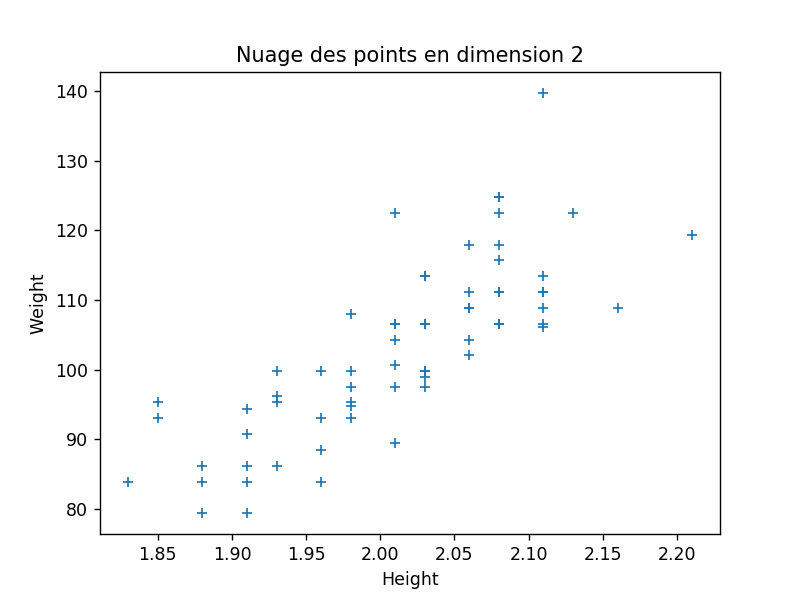

In [13]:
fig = plt.figure()
plt.plot(basket_data['Height'],basket_data['Weight'],'+')
plt.title('Nuage des points en dimension 2')
plt.xlabel('Height')
plt.ylabel('Weight');

<IPython.core.display.Javascript object>


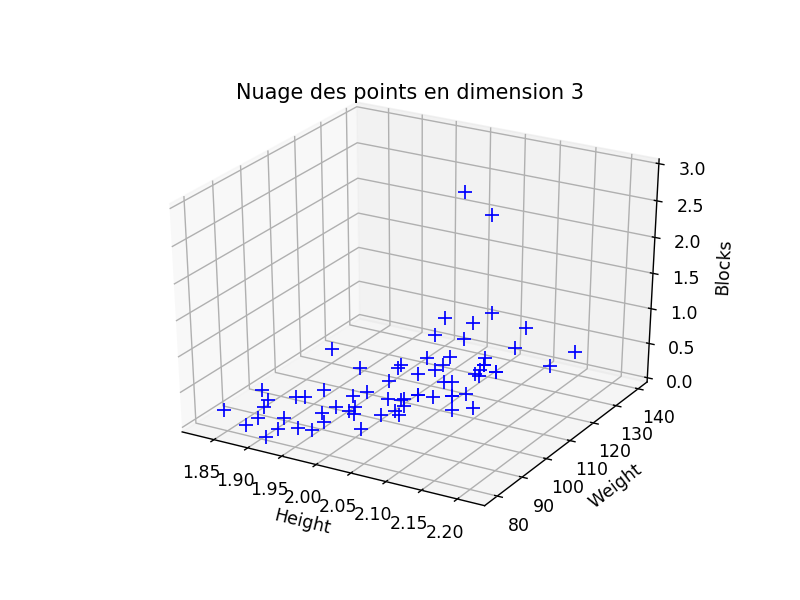

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(basket_data['Height'], basket_data['Weight'], basket_data['Blocks'], '+', markersize=8, color='blue')
ax.set_title('Nuage des points en dimension 3')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Blocks');

## Question 5

Une ACP ne s'effectue que sur des variables quantitatives donc on commence par créer un nouveau dataframe *basket_data_num* qui ne contient que les variables quantitatives:

In [15]:
IDnum = [ide for ide in range(30)  if  (basket_data.dtypes[ide] ==  'float64') or (basket_data.dtypes[ide] ==  'int64')]
basket_data_num  = basket_data.iloc[:,IDnum]

In [16]:
basket_data_num.head()

,Height,Weight,Age,Salary,Games played,Minutes,Fields goals made,Fields goal attempted,% Fields goal made,3pts FGM,...,Total rebond,Assits,Turnover,Steals,Blocks,Blocked fields goals attempted,Personnal fouls,Personnal fouls drawn,Points,Point differential of the score
0,2.08,111.1,33,341756,42,14.9,1.7,2.9,0.58,0.0,...,4.1,0.4,0.6,0.4,1.0,0.3,2.1,2.1,4.9,2.3
1,2.11,106.1,28,17545000,74,33.2,6.6,12.3,0.54,0.3,...,6.8,1.7,1.7,0.9,1.4,0.6,2.3,3.1,16.6,6.4
2,2.11,139.7,24,854389,4,2.9,0.8,1.3,0.60,0.0,...,1.8,0.0,0.5,0.0,0.0,0.3,1.0,0.0,1.5,-2.8
3,1.93,99.8,30,17182000,69,34.6,8.2,15.8,0.52,0.2,...,5.0,5.1,2.8,1.9,0.8,0.5,2.0,4.7,21.2,8.3
4,2.03,97.5,31,1500000,38,5.8,0.6,1.6,0.34,0.4,...,0.6,0.3,0.1,0.1,0.2,0.0,0.4,0.1,1.6,-0.4


Puis on centre et on réduit les données:

In [17]:
basket_data_num_nor = (basket_data_num - basket_data_num.mean())/basket_data_num.std()

In [18]:
basket_data_num_nor.head()

,Height,Weight,Age,Salary,Games played,Minutes,Fields goals made,Fields goal attempted,% Fields goal made,3pts FGM,...,Total rebond,Assits,Turnover,Steals,Blocks,Blocked fields goals attempted,Personnal fouls,Personnal fouls drawn,Points,Point differential of the score
0,0.782130,0.644378,0.878307,-0.737933,-0.354672,-0.448739,-0.477686,-0.674158,1.232050,-0.932754,...,0.163764,-0.702674,-0.617329,-0.461596,1.011800,-0.071398,0.706264,0.392592,-0.420526,0.054467
1,1.150087,0.234514,-0.080604,2.380595,0.839102,1.372612,1.489495,1.188104,0.865622,-0.493936,...,1.077212,0.039727,0.789736,0.559242,1.744757,0.984268,0.980812,1.061452,1.288894,1.317472
2,1.150087,2.988802,-0.847733,-0.645006,-1.772279,-1.643067,-0.839005,-0.991139,1.415265,-0.932754,...,-0.614359,-0.931105,-0.745243,-1.278267,-0.820593,-0.071398,-0.803749,-1.012014,-0.917281,-1.516588
3,-1.057653,-0.281915,0.302960,2.314792,0.652575,1.511951,2.131840,1.881499,0.682407,-0.640209,...,0.468246,1.981391,2.196800,2.600919,0.645321,0.632380,0.568990,2.131627,1.960974,1.902767
4,0.168869,-0.470453,0.494742,-0.527972,-0.503894,-1.354438,-0.919298,-0.931705,-0.966522,-0.347663,...,-1.020336,-0.759781,-1.256903,-1.074099,-0.454115,-1.127064,-1.627392,-0.945128,-0.902671,-0.777268


Enfin, on utilise la fonction *fit()* de la classe *PCA* du module *sklearn.decomposition* pour réaliser l'ACP en ne spécifiant aucun paramètre car le comportement par défaut est de garder toutes les composantes.

In [19]:
pca_nba = PCA()
# calcul les composantes principales 
pca_nba.fit(basket_data_num_nor)
# ajuste ces composantes sur les données 
D = pca_nba.transform(basket_data_num_nor)

## Question 6

Voici la part de la variance expliquée par chaque composante :

In [20]:
var_r = pd.Series(pca_nba.explained_variance_ratio_)
var_r

0     0.463941
1     0.167327
2     0.066932
3     0.064620
4     0.039201
5     0.033964
6     0.031639
7     0.028256
8     0.021475
9     0.017952
10    0.012767
11    0.011589
12    0.009120
13    0.006929
14    0.006129
15    0.005055
16    0.004036
17    0.002851
18    0.002720
19    0.001303
20    0.001040
21    0.000591
22    0.000343
23    0.000123
24    0.000092
25    0.000003
26    0.000002
dtype: float64

In [21]:
var_r.cumsum()

0     0.463941
1     0.631268
2     0.698201
3     0.762821
4     0.802022
5     0.835986
6     0.867624
7     0.895880
8     0.917355
9     0.935307
10    0.948075
11    0.959664
12    0.968784
13    0.975714
14    0.981842
15    0.986897
16    0.990933
17    0.993783
18    0.996503
19    0.997806
20    0.998846
21    0.999437
22    0.999780
23    0.999903
24    0.999995
25    0.999998
26    1.000000
dtype: float64

Il faut au minimum 9 composantes pour que la part de la variance expliquée soit supérieur à $0.9$. On aurait pu répondre à cette question en affichant la somme cumulée de la part de la variance expliquée par chaque composante, une droite horizontale $y=0.9$ et regarder où se trouve l'intersection. 

<IPython.core.display.Javascript object>


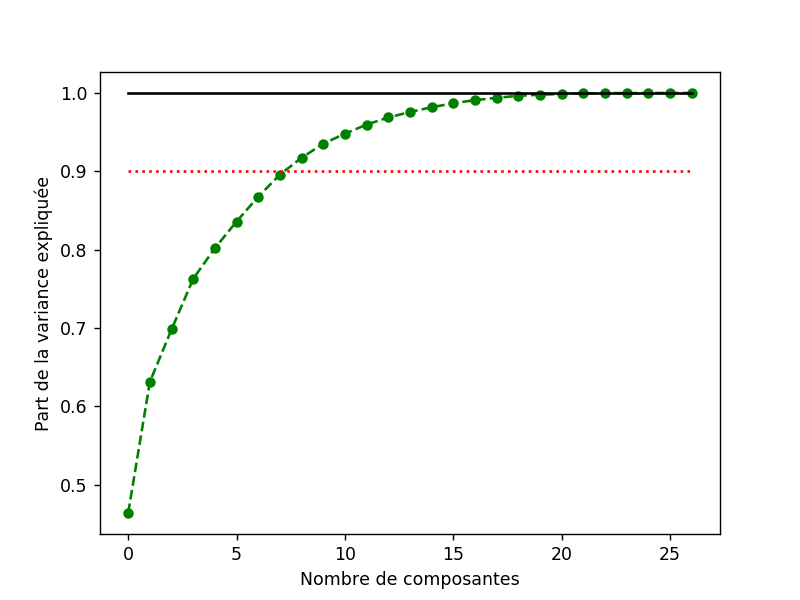

Text(0,0.5,u'Part de la variance expliqu\xe9e')

In [22]:
plt.figure()
cum = var_r.cumsum()
plt.plot(range(cum.size),cum,'o--', markersize=5, color='green')
plt.plot(range(cum.size),np.ones(cum.size),'-',  color='black')
plt.plot(range(cum.size),np.ones(cum.size)*0.9,':',  color='red')
plt.xlabel('Nombre de composantes')
plt.ylabel(u'Part de la variance expliquée')

## Question 7

<IPython.core.display.Javascript object>


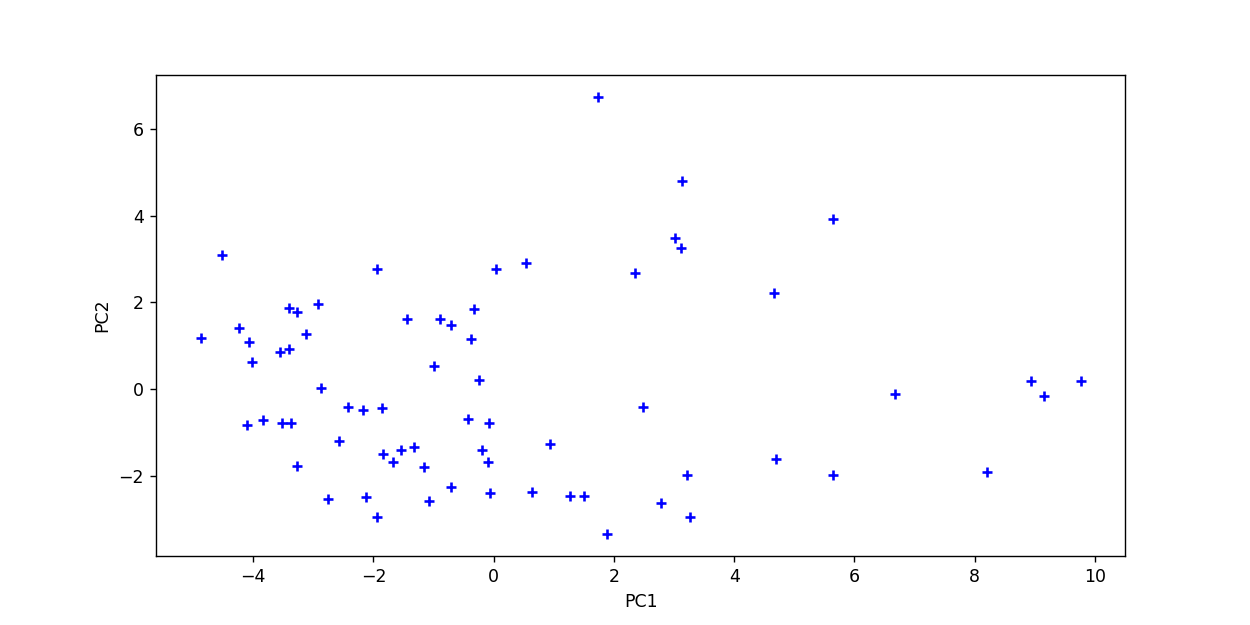

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
plt.scatter(D[:,0],D[:,1],marker="+",color='blue')
plt.xlabel("PC1")
plt.ylabel("PC2");

## Question 8

On commence par calculer les individus moyens pour chaque valeurs de la variable **Position**:

In [24]:
basket_data['Position'].unique()

array(['Center', 'Guard', 'Forward'], dtype=object)

In [25]:
ind_moy_Center = basket_data_num_nor.loc[basket_data['Position']=='Center',:].mean(0)
ind_moy_Guard = basket_data_num_nor.loc[basket_data['Position']=='Guard',:].mean(0)
ind_moy_Forward = basket_data_num_nor.loc[basket_data['Position']=='Forward',:].mean(0)
ind_moy_Forward

Height                             0.340582
Weight                             0.233147
Age                                0.079214
Salary                             0.023075
Games played                      -0.135813
Minutes                           -0.142526
Fields goals made                 -0.081573
Fields goal attempted             -0.088404
% Fields goal made                -0.203129
3pts FGM                          -0.016111
3pts  FGA                         -0.030775
% 3pts FG                          0.049141
Free throws made                  -0.013224
Free throws attempted             -0.038089
% FT                              -0.157625
Off rebond                        -0.024616
Def rebond                        -0.030176
Total rebond                      -0.031331
Assits                            -0.257233
Turnover                          -0.131252
Steals                            -0.291457
Blocks                            -0.002125
Blocked fields goals attempted  

Puis, on projette ces individus moyens sur les deux premières composantes principales:

In [26]:
ind_moy_Center_proj = pca_nba.transform(ind_moy_Center.values.reshape(1,-1))
ind_moy_Guard_proj = pca_nba.transform(ind_moy_Guard.values.reshape(1,-1))
ind_moy_Forward_proj = pca_nba.transform(ind_moy_Forward.values.reshape(1,-1))

Enfin, on affiche les deux composantes princiaples avec des couleurs différentes selon les valeurs de **Position** et on affiche les individus moyens projetés:

<IPython.core.display.Javascript object>


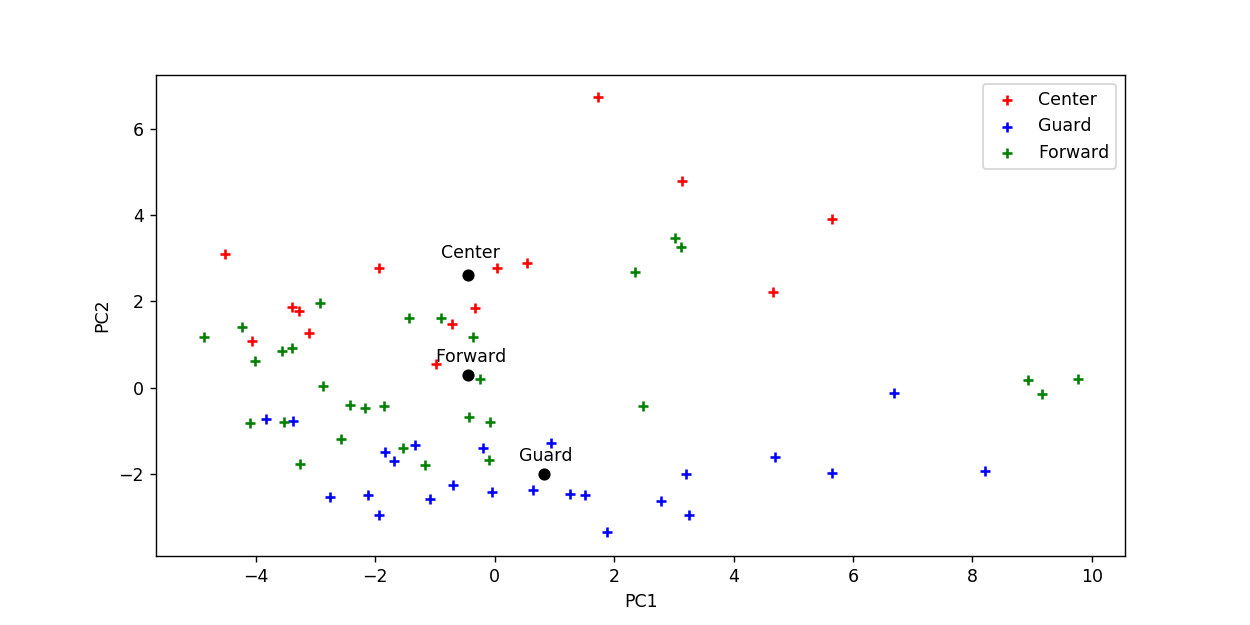

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
for c,pos in zip(['red','blue','green'],basket_data['Position'].unique()):
    plt.scatter(D[basket_data['Position']==pos,0],D[basket_data['Position']==pos,1],marker="+",color=c,label=pos)
plt.scatter(ind_moy_Center_proj[:,0],ind_moy_Center_proj[:,1],marker="o",color='black')
plt.text(-0.9, 3, 'Center')
plt.scatter(ind_moy_Guard_proj[:,0],ind_moy_Guard_proj[:,1],marker="o",color='black')
plt.text(0.4, -1.7, 'Guard')
plt.scatter(ind_moy_Forward_proj[:,0],ind_moy_Forward_proj[:,1],marker="o",color='black')
plt.text(-1, 0.6, 'Forward')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc='best');

On remarque que les données sont assez séparées selon les valeurs de la variable **Position**. Cela suggère que l'on peut "facilement deviner" la position d'un joueur sur le terrain à l'aide de combinaisons linéaires de caractéristiques physiques et techniques de ce joueur.